## Task 1
Particle Filter is built for estimating the states of a drone. Similar to Nonlinear Kalman Filter project, a 15 state model is used for estimation.

#### Process Model
$$
    \dot{\boldsymbol{x}} = \begin{bmatrix} \dot{\boldsymbol{p}} \\ \boldsymbol{G}\left(\boldsymbol{q}\right)^{-1}\left(\boldsymbol{u}_\omega - \boldsymbol{b}_g\right) \\ \boldsymbol{g} + \boldsymbol{R}\left(\boldsymbol{q}\right)\left(\boldsymbol{u}_a - \boldsymbol{b}_a\right) \\ \boldsymbol{n}_{bg} \\ \boldsymbol{n}_{ba} \end{bmatrix}
$$

## Particle Filter

#### Predict Step
1) Initial particles are generated by taking an approximate volume of the map. Particles are dispersed in uniform fashion.
2) Gyroscope and Acceleration values are sampled from the noise with normal distribution, which are used for computing state derivative.
$$
u_w = \mathcal{N} (0, 1) * Q_g \\
u_a = \mathcal{N} (0, 1) * Q_a
$$
3) New particles are predicted by computing the state derivative for each particle and adding to the original particles.
$$
x = x + \dot{x} * dt
$$
Here x represents the particles. As suggested in the project description vectorized form of states with numpy is used for faster computation.

#### Update Step
1) The state estimate is used to compute the error with the predicted states. 
2) Observation model is applied to the predicted particles.
$$\begin{aligned}
    \boldsymbol{\mathcal{Z}}_{k|k-1} &= \boldsymbol{C}\boldsymbol{x}_{k|k-1} \\
        &= \begin{bmatrix} \boldsymbol{I}_3 & \boldsymbol{0}_3 & \boldsymbol{0}_3 & \boldsymbol{0}_3 & \boldsymbol{0}_3 \\ \boldsymbol{0}_3 & \boldsymbol{I}_3 & \boldsymbol{0}_3 & \boldsymbol{0}_3 & \boldsymbol{0}_3 \end{bmatrix}\boldsymbol{x}_{k|k-1}
\end{aligned}$$
3) Importance weight is computed for each particle.
$$
w_i = \exp{(-0.5 (e * R^{-1} * e^T))}
$$
The weights are normalized.

4) Position and Orientation are estimated with the weights generated.
5) The particles are resampled with low variance resampling as suggested.


In [2]:
import covariances

R = covariances.average_covarince()

#### Covariance Values used for Particle Filter Implementation

In [2]:
print(R)

[[ 0.00655842  0.00077377  0.00185976 -0.00909111  0.00564769  0.00876016]
 [ 0.00077377  0.00725052 -0.00114391 -0.00175257  0.00152363 -0.00394362]
 [ 0.00185976 -0.00114391  0.01090496 -0.00051478  0.00305316  0.0004002 ]
 [-0.00909111 -0.00175257 -0.00051478  0.2532229  -0.00800576 -0.25002154]
 [ 0.00564769  0.00152363  0.00305316 -0.00800576  0.00623545  0.00700121]
 [ 0.00876016 -0.00394362  0.0004002  -0.25002154  0.00700121  0.25265415]]


#### Noise Selection

To select the noise values for angular rate and acceleration, noise_comapre() from inference.py was run. The inital values of noise were selected based on guesses. I checked extreme values in the beginning to see how the filter reacts. The goal was reduce the RMSE values for the filtered data. I observed that values close to 100 for acceleration and values close to 0.1 gave good results. Then to fine tune the values, noise_compare() function was used where in I fed lists of data to loop through to provide a good combination of Qa and Qg. The table below shows the RMSE values for the combination across the 7 datafiles.

$$
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Noise in Qa / Noise in Qg} & \textbf{File Name} & \textbf{0.01} & \textbf{0.1} & \textbf{1} \\ \hline
 & \text{data/studentdata1.mat} & 0.1186 & 0.1053 & 0.1112 \\ 
 & \text{data/studentdata2.mat} & 0.1081 & 0.1111 & 0.1086 \\ 
 & \text{data/studentdata3.mat} & 0.0918 & 0.0985 & 0.0946 \\ 
90 & \text{data/studentdata4.mat} & 0.14 & 0.1433 & 0.185 \\ 
 & \text{data/studentdata5.mat} & 0.1317 & 0.1243 & 0.1166 \\ 
 & \text{data/studentdata6.mat} & 0.1407 & 0.1034 & 0.1054 \\ 
 & \text{data/studentdata7.mat} & 0.138 & 0.1537 & 0.1113 \\ \hline
 & \text{data/studentdata1.mat} & 0.1078 & 0.1089 & 0.1066 \\ 
 & \text{data/studentdata2.mat} & 0.1019 & 0.1096 & 0.1132 \\ 
 & \text{data/studentdata3.mat} & 0.0934 & 0.1019 & 0.0961 \\ 
100 & \text{data/studentdata4.mat} & 0.1275 & 0.1385 & 0.1792 \\ 
 & \text{data/studentdata5.mat} & 0.1841 & 0.1567 & 0.1211 \\ 
 & \text{data/studentdata6.mat} & 0.129 & 0.1348 & 0.1073 \\ 
 & \text{data/studentdata7.mat} & 0.1049 & 0.1044 & 0.1585 \\ \hline
 & \text{data/studentdata1.mat} & 0.1108 & 0.1104 & 0.1076 \\ 
 & \text{data/studentdata2.mat} & 0.1084 & 0.1101 & 0.104 \\ 
 & \text{data/studentdata3.mat} & 0.0971 & 0.0937 & 0.1025 \\ 
110 & \text{data/studentdata4.mat} & 0.1381 & 0.1337 & 0.1687 \\ 
 & \text{data/studentdata5.mat} & 0.1285 & 0.1226 & 0.1108 \\ 
 & \text{data/studentdata6.mat} & 0.1556 & 0.1339 & 0.1135 \\ 
 & \text{data/studentdata7.mat} & 0.1779 & 0.1208 & 0.1803 \\ \hline
 & \text{data/studentdata1.mat} & 0.1078 & 0.1102 & 0.1081 \\ 
 & \text{data/studentdata2.mat} & 0.1057 & 0.1091 & 0.1099 \\ 
 & \text{data/studentdata3.mat} & 0.1012 & 0.0982 & 0.0962 \\ 
120 & \text{data/studentdata4.mat} & 0.1372 & 0.1346 & 0.1594 \\ 
 & \text{data/studentdata5.mat} & 0.134 & 0.1068 & 0.117 \\ 
 & \text{data/studentdata6.mat} & 0.1282 & 0.1297 & 0.1265 \\ 
 & \text{data/studentdata7.mat} & 0.1323 & 0.1344 & 0.1842 \\ \hline
 & \text{data/studentdata1.mat} & 0.1076 & 0.1101 & 0.1088 \\ 
& \text{data/studentdata2.mat} & 0.1084 & 0.1055 & 0.1048 \\ 
 & \text{data/studentdata3.mat} & 0.0963 & 0.0923 & 0.0967 \\ 
130 & \text{data/studentdata4.mat} & 0.1251 & 0.1308 & 0.1578 \\ 
 & \text{data/studentdata5.mat} & 0.1448 & 0.1362 & 0.1303 \\ 
 & \text{data/studentdata6.mat} & 0.1141 & 0.106 & 0.1377 \\ 
 & \text{data/studentdata7.mat} & 0.1139 & 0.1723 & 0.156 \\ \hline
\end{array}
$$


From the table above Noise were selected to be Qa=100 and Qg=0.1

Let us have a look at the plots for each dataset.

#### Plots for StudentData1

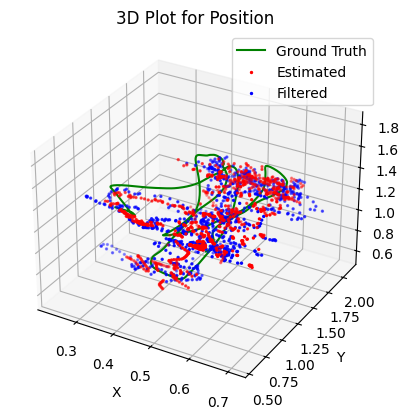

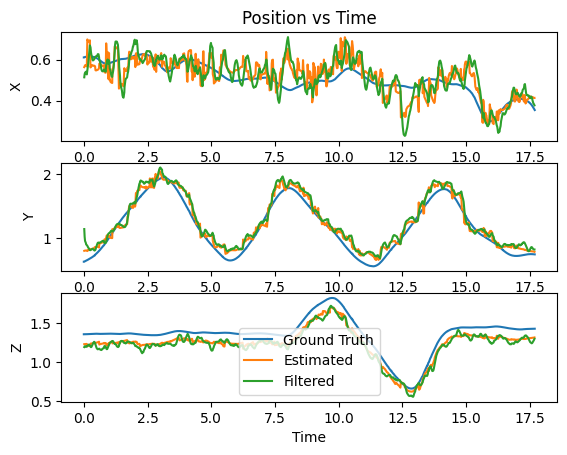

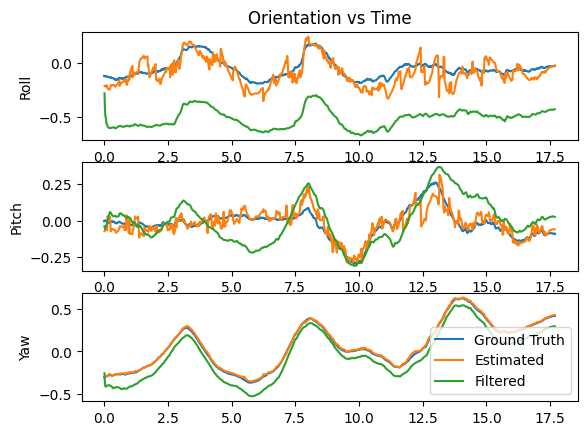

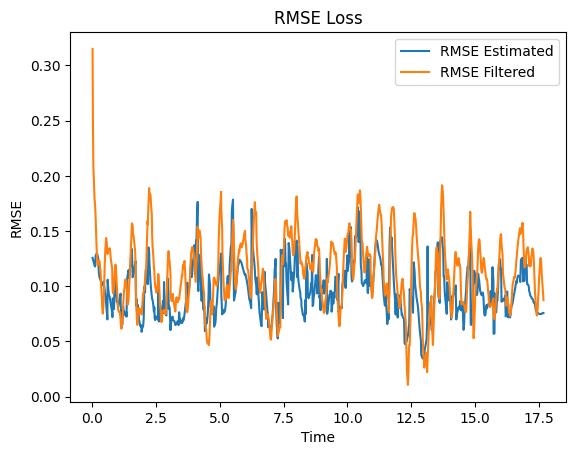

In [2]:
from simulation import simulate
import plots

estimated_data, est_times, gt, gt_tstamp, filtered_data, _, _ = simulate(r"data\studentdata1.mat", 2000, "weighted_avg", R, Qa=100, Qg=0.1)
plots.plot_results(estimated_data, est_times, gt, gt_tstamp, filtered_data)

#### Plots for StudentData2

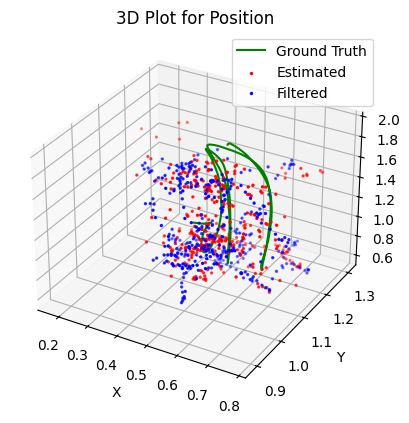

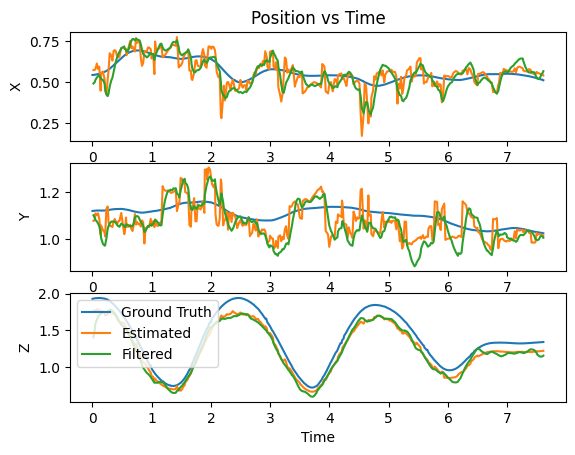

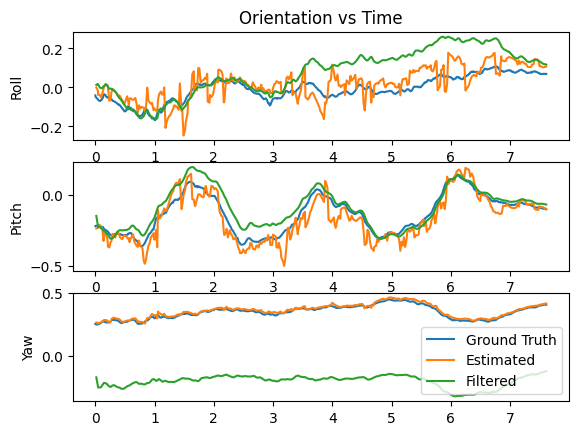

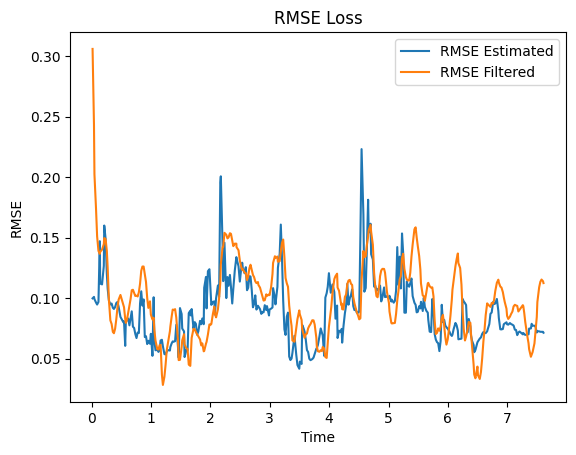

In [3]:
estimated_data, est_times, gt, gt_tstamp, filtered_data, _, _ = simulate(r"data\studentdata2.mat", 2000, "weighted_avg", R, Qa=100, Qg=0.1)
plots.plot_results(estimated_data, est_times, gt, gt_tstamp, filtered_data)

#### Plots for StudentData3

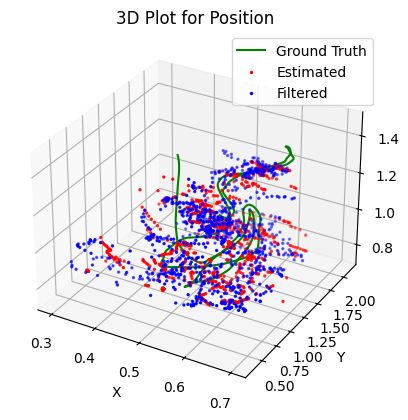

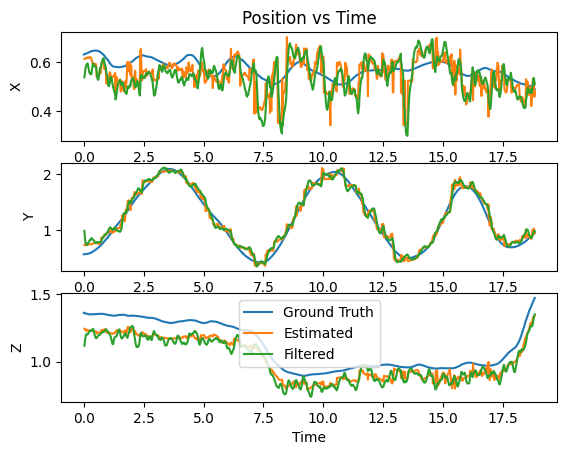

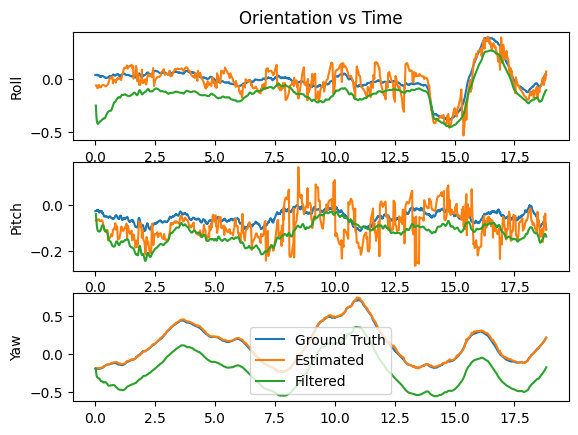

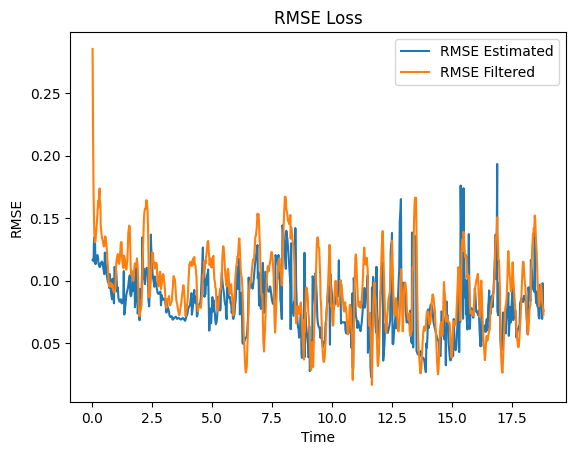

In [4]:
estimated_data, est_times, gt, gt_tstamp, filtered_data, _, _ = simulate(r"data\studentdata3.mat", 2000, "weighted_avg", R, Qa=100, Qg=0.1)
plots.plot_results(estimated_data, est_times, gt, gt_tstamp, filtered_data)

#### Plots for StudentData4

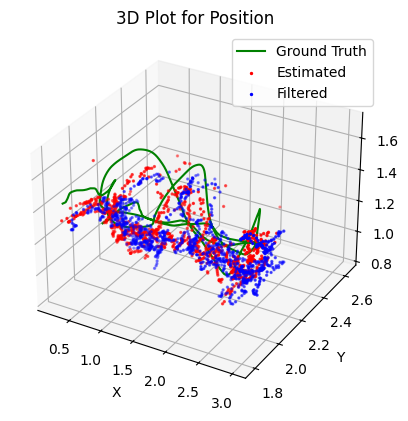

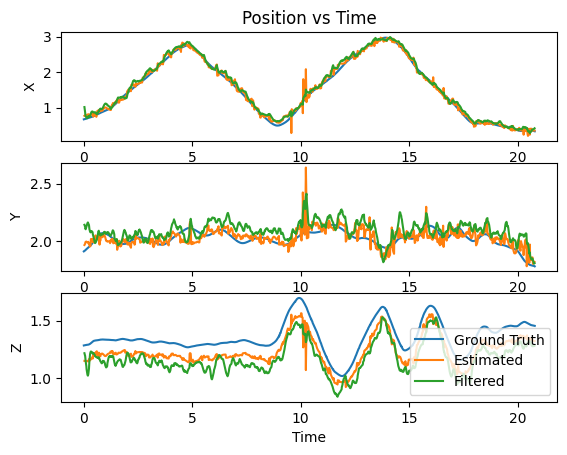

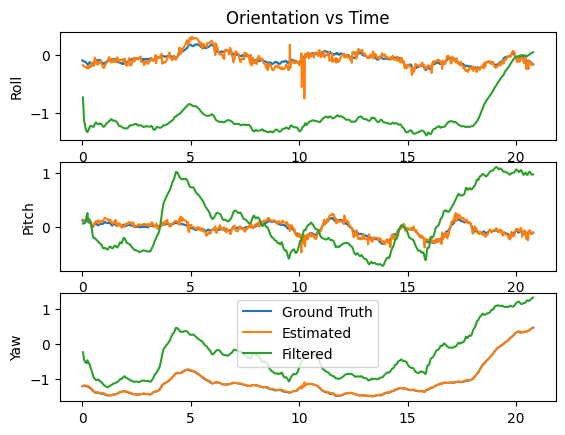

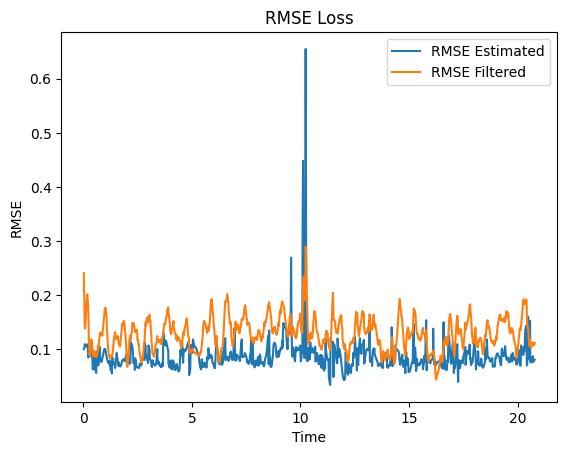

In [5]:
estimated_data, est_times, gt, gt_tstamp, filtered_data, _, _ = simulate(r"data\studentdata4.mat", 2000, "weighted_avg", R, Qa=100, Qg=0.1)
plots.plot_results(estimated_data, est_times, gt, gt_tstamp, filtered_data)

#### Plots for StudentData5

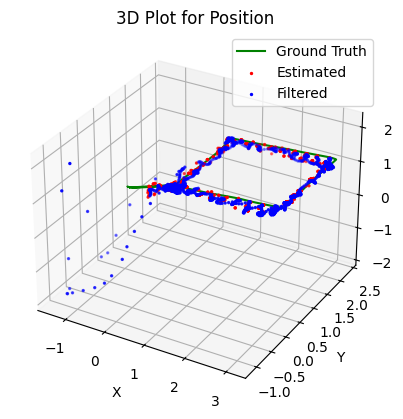

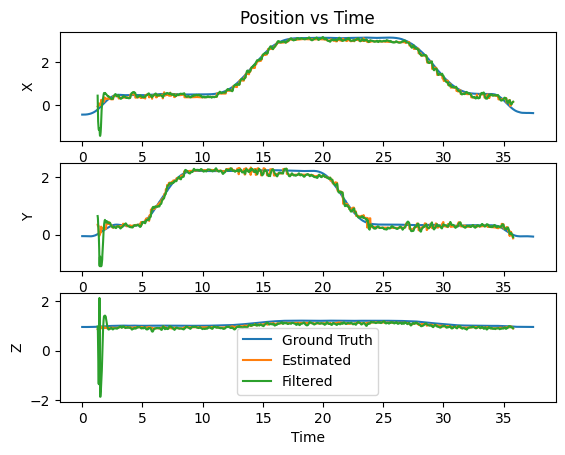

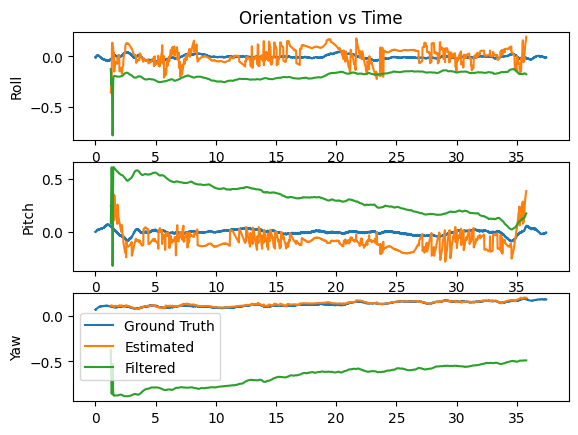

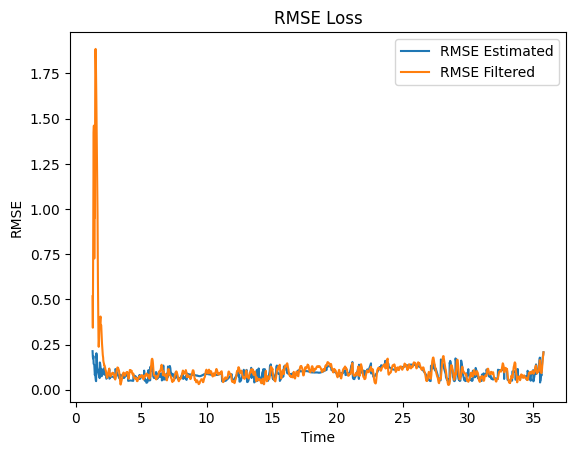

In [6]:
estimated_data, est_times, gt, gt_tstamp, filtered_data, _, _ = simulate(r"data\studentdata5.mat", 2000, "weighted_avg", R, Qa=100, Qg=0.1)
plots.plot_results(estimated_data, est_times, gt, gt_tstamp, filtered_data)

#### Plots for StudentData6

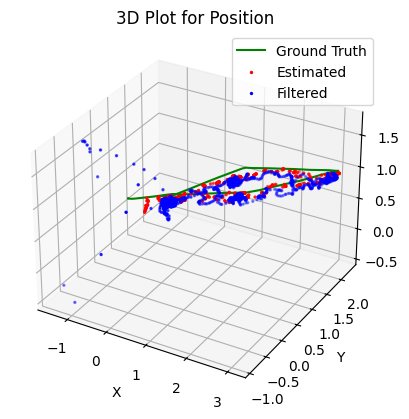

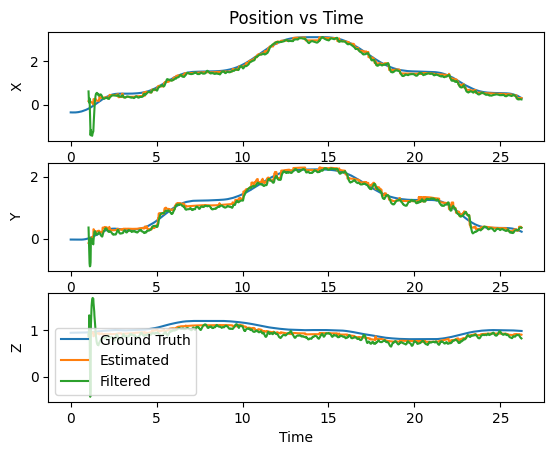

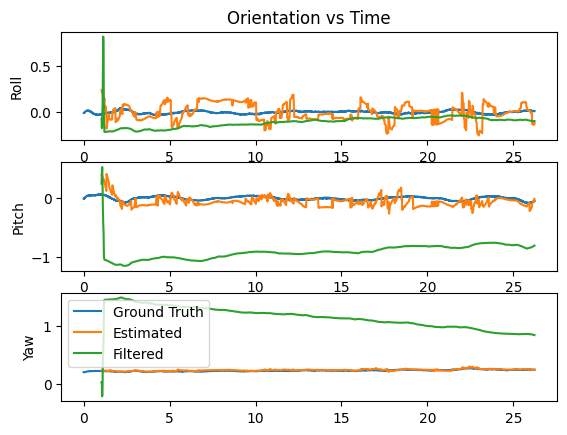

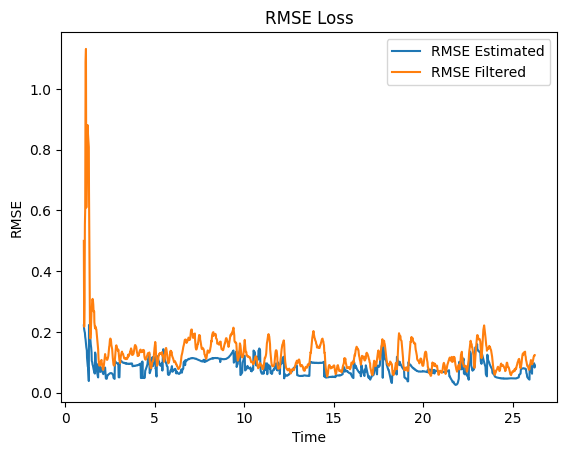

In [7]:
estimated_data, est_times, gt, gt_tstamp, filtered_data, _, _ = simulate(r"data\studentdata6.mat", 2000, "weighted_avg", R, Qa=100, Qg=0.1)
plots.plot_results(estimated_data, est_times, gt, gt_tstamp, filtered_data)

#### Plots for StudentData7

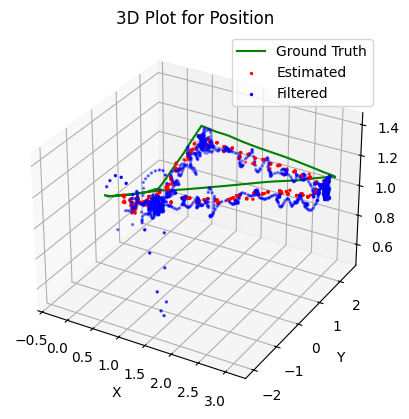

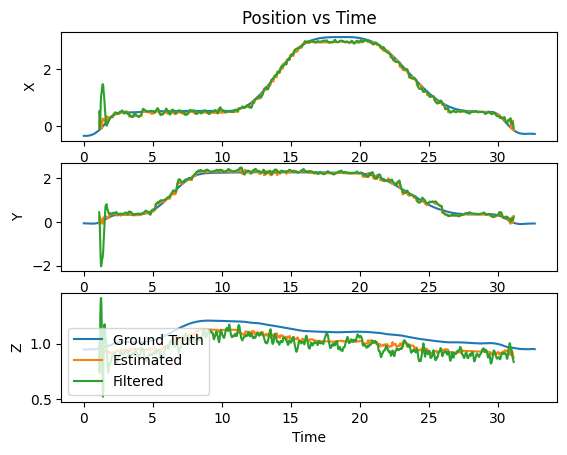

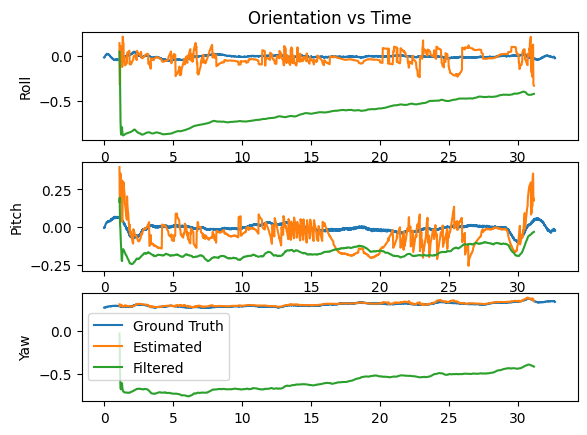

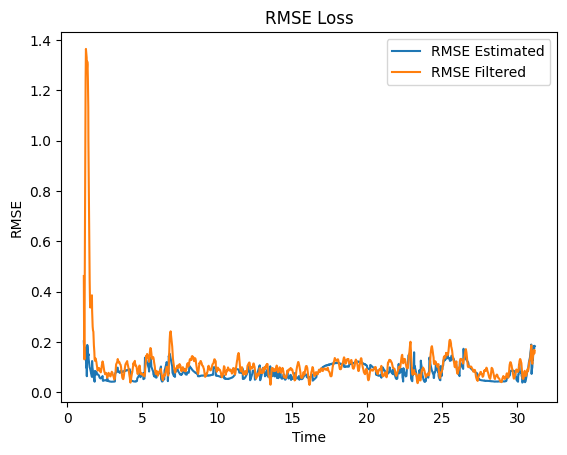

In [8]:
estimated_data, est_times, gt, gt_tstamp, filtered_data, _, _ = simulate(r"data\studentdata7.mat", 2000, "weighted_avg", R, Qa=100, Qg=0.1)
plots.plot_results(estimated_data, est_times, gt, gt_tstamp, filtered_data)

## Task 2

#### Comparision of methods to find singular position from the estimated particles

Parameters:

Particle Count - 1000 to 5000, Noise for Gyro - 0.1, Noise for Acceleration - 100

$$
\begin{array}{|c|c|c|c|c|}
\hline
\text{Particle Count} & \text{File} & \text{Weighted Average} & \text{Average} & \text{Highest Weight} \\
\hline

\hline
 & \text{data/studentdata1.mat} & 0.1076 & 0.1159 & 0.1230 \\
 & \text{data/studentdata2.mat} & 0.1082 & 0.1156 & 0.1185 \\
1000 & \text{data/studentdata3.mat} & 0.0970 & 0.1037 & 0.1179 \\
 & \text{data/studentdata4.mat} & 0.1399 & 0.1582 & 0.1453 \\
 & \text{data/studentdata5.mat} & 0.1707 & 0.1430 & 0.1606 \\
 & \text{data/studentdata6.mat} & 0.1169 & 0.1093 & 0.1294 \\
\hline

\hline
 & \text{data/studentdata1.mat} & 0.1064 & 0.1116 & 0.1199 \\
 & \text{data/studentdata2.mat} & 0.1069 & 0.1096 & 0.1121 \\
2000 & \text{data/studentdata3.mat} & 0.0928 & 0.0976 & 0.1060 \\
 & \text{data/studentdata4.mat} & 0.1370 & 0.1562 & 0.1336 \\
 & \text{data/studentdata5.mat} & 0.1724 & 0.1170 & 0.1365 \\
 & \text{data/studentdata6.mat} & 0.0980 & 0.1481 & 0.1196 \\
\hline

\hline
 & \text{data/studentdata1.mat} & 0.1027 & 0.1031 & 0.1146 \\
 & \text{data/studentdata2.mat} & 0.1039 & 0.1037 & 0.1096 \\
5000 & \text{data/studentdata3.mat} & 0.0877 & 0.0922 & 0.1031 \\
 & \text{data/studentdata4.mat} & 0.1373 & 0.1523 & 0.1342 \\
 & \text{data/studentdata5.mat} & 0.1030 & 0.1124 & 0.1150 \\
 & \text{data/studentdata6.mat} & 0.0951 & 0.1139 & 0.1145 \\
\hline
\end{array}
$$

Weighted Average method provided the best results.

#### Average RMSE over all the particles to measure the overall performance of the filter
Parameters chosen:

Particle Count - 2000, Noise for Gyro - 0.1, Noise for Acceleration - 100

$$
\begin{array}{|c|c|}
\hline
\text{File} & \text{RMSE Value} \\
\hline
\text{data/studentdata1.mat} & 0.107716 \\
\text{data/studentdata2.mat} & 0.107820 \\
\text{data/studentdata3.mat} & 0.095609 \\
\text{data/studentdata4.mat} & 0.161442 \\
\text{data/studentdata5.mat} & 0.107345 \\
\text{data/studentdata6.mat} & 0.102363 \\
\hline
\end{array}
$$

The RMSE values across all the particles is marginally deviant from the Weighted Average RMSE. Thus, we can infer that the Particle Filter performance in satisfactory.

#### Filter Performce For Different Number of Particles

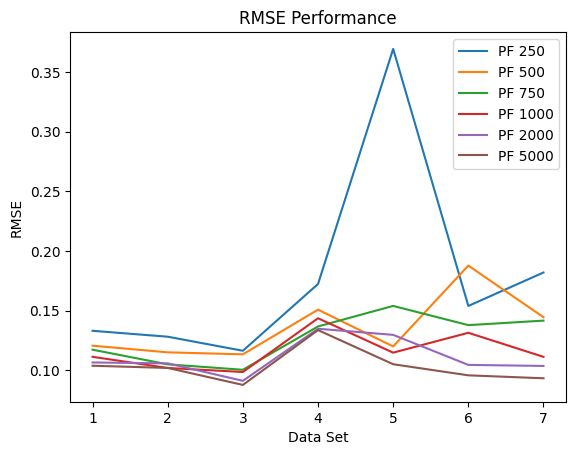

In [1]:
import inference

inference.filter_performance()

As we can see from the graph, Filter with 5000 particle provides the best result, but the difference becomes less between 2000 and 5000 particles. We can observe the trend that, when the particles are less the error is high but as the number of particles increase the error reduces but the rate of error reduction slows down after 1000 particles. We can suspect that the error difference between 10000 particles and 5000 particles will be even lesser. 

## Task 3

#### Ease of Implementation

Particle filter was easier to implement in comparision to UKF. 
1) The number of equations and parameters that are used in UKF are higher than Particle Filter.
2) As I was using vectorized form of states in both the filters, matching the array sizes took more time in UKF as there were many matrix operations to be carried out.
3) Hyperparameters tuning was easier in Particle Filter as only noise had to be adjusted. Whereas in UKF covairance tuning took time which did not take significant time in Particle Filter. As I borrowed the results of covariance from UKF project, tuning took significantly less time.
4) Spending weeks together on UKF gave me a good understanding of matrices and numpy which significantly helped me implementing Particle Filter, this played an important role in ease of implementation.

#### Speed of Code

The graph below depicts the execution time taken for the filters.

UKF outperforms particle filter my a great margin for equivalant accuracy in results. Even though there are more matrix operations in UKF, the number of elements in Particle Filter are much higher. Also, in UKF we deal with 2D matrix, while in Particle Filter we have 3D matrices which significantly increase the run time.

Execution time of code is important in real world scenarios where real time tracking is essential. A faster code can help the system make quicker estimation of states. For example, an autonomous vehicle which is moving at 100 miles per hour would require state estimation at high rate for localization which is only possible with codes that have lower execution time.

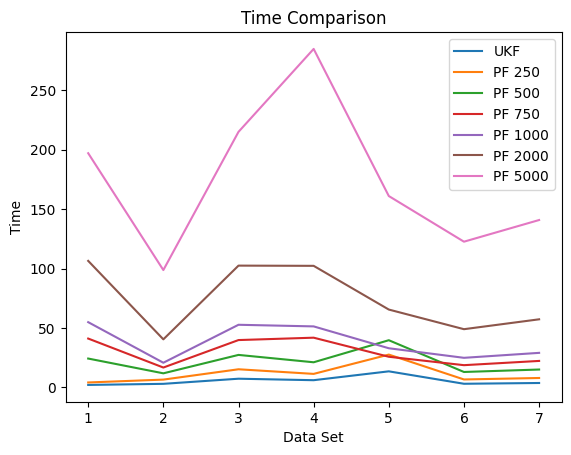

In [1]:
import inference

inference.compare_time()

#### Result Accuracy

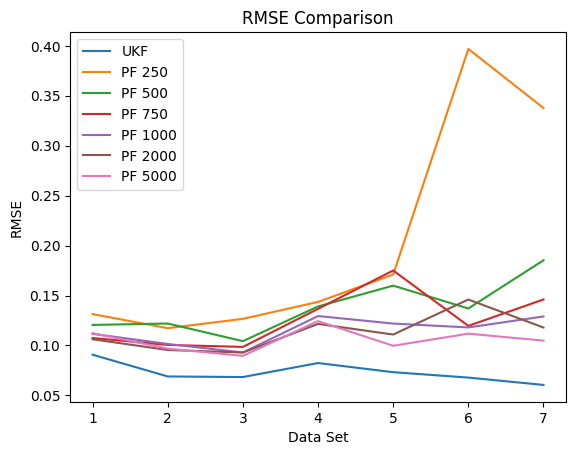

In [3]:
import inference

inference.rmse_compare_with_ukf(R)

From the graph we can deduce that UKF performs better than Particle Filter. Particle Filter may outperform UKF with particles higher than 5000. Considering the given system of drone which is not highly nonlinear the UKF is bound to perform better whereas Particle Filter has high randomness to it, which gives out higher RMSE. 

Possibly for highly nonlinar systems Particle Filter may perform better as it is more robust in comparision to UKF.